In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [152]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

<h3>
    
1. **Gender** :
   → *Genre des passagers (Femme ou Homme)*

2. **Customer Type** :
   → *Type de client (Client fidèle ou non fidèle)*

3. **Age** :
   → *Âge réel du passager*

4. **Type of Travel** :
   → *Motif du voyage (Voyage personnel ou professionnel)*

5. **Class** :
   → *Classe de voyage dans l’avion (Affaires, Économie ou Économie Plus)*

6. **Flight Distance** :
   → *Distance du vol (en kilomètres ou miles selon le dataset)*

7. **Inflight wifi service** :
   → *Niveau de satisfaction concernant le Wi-Fi à bord (0 : non applicable ; 1 à 5)*

8. **Departure/Arrival time convenient** :
   → *Satisfaction sur la commodité des horaires de départ/arrivée*

9. **Ease of Online booking** :
   → *Facilité de réservation en ligne (niveau de satisfaction)*

10. **Gate location** :
    → *Satisfaction par rapport à l’emplacement de la porte d’embarquement*

11. **Food and drink** :
    → *Satisfaction concernant la nourriture et les boissons*

12. **Online boarding** :
    → *Satisfaction sur le processus d’embarquement en ligne*

13. **Seat comfort** :
    → *Niveau de confort du siège selon le passager*

14. **Inflight entertainment** :
    → *Satisfaction sur les divertissements disponibles en vol*

15. **On-board service** :
    → *Satisfaction générale sur les services à bord*

16. **Leg room service** :
    → *Satisfaction concernant l’espace pour les jambes*

17. **Baggage handling** :
    → *Satisfaction par rapport à la gestion des bagages*

18. **Check-in service** :
    → *Satisfaction sur le service d’enregistrement (check-in)*

19. **Inflight service** :
    → *Satisfaction globale sur le service durant le vol*

20. **Cleanliness** :
    → *Niveau de propreté de l’avion selon le passager*

21. **Departure Delay in Minutes** :
    → *Nombre de minutes de retard au départ*

22. **Arrival Delay in Minutes** :
    → *Nombre de minutes de retard à l’arrivée*

23. **Satisfaction** :
    → *Niveau de satisfaction global du passager (Satisfait, Neutre ou Insatisfait)*
</h3>

In [153]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [154]:
data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test_data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
print(f"Nombre de lignes et colonnes dans les données d'entraînement : {data.shape}")
print(f"Nombre de lignes et colonnes dans les données de test : {test_data.shape}")

Nombre de lignes et colonnes dans les données d'entraînement : (103904, 23)
Nombre de lignes et colonnes dans les données de test : (25976, 23)


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [156]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<h3>Conversion des variables qualitatives ordinales en type object</h3>

In [157]:
# Liste des colonnes Qualitative (Ordinale)
Qualitative_Ordinale = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                 'Inflight entertainment', 'On-board service', 'Leg room service', 
                 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

# Conversion des colonnes catégorielles spécifiées en type 'object'
data[Qualitative_Ordinale] = data[Qualitative_Ordinale].astype(object)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  object 
 7   Departure/Arrival time convenient  103904 non-null  object 
 8   Ease of Online booking             103904 non-null  object 
 9   Gate location                      103904 non-null  object 
 10  Food and drink                     103904 non-null  object 
 11  Online boarding                    1039

<h1>Analyse exploratoire des données</h1>

In [159]:
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = data.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


## Analyse univariée
<h3>Quantitative</h3>

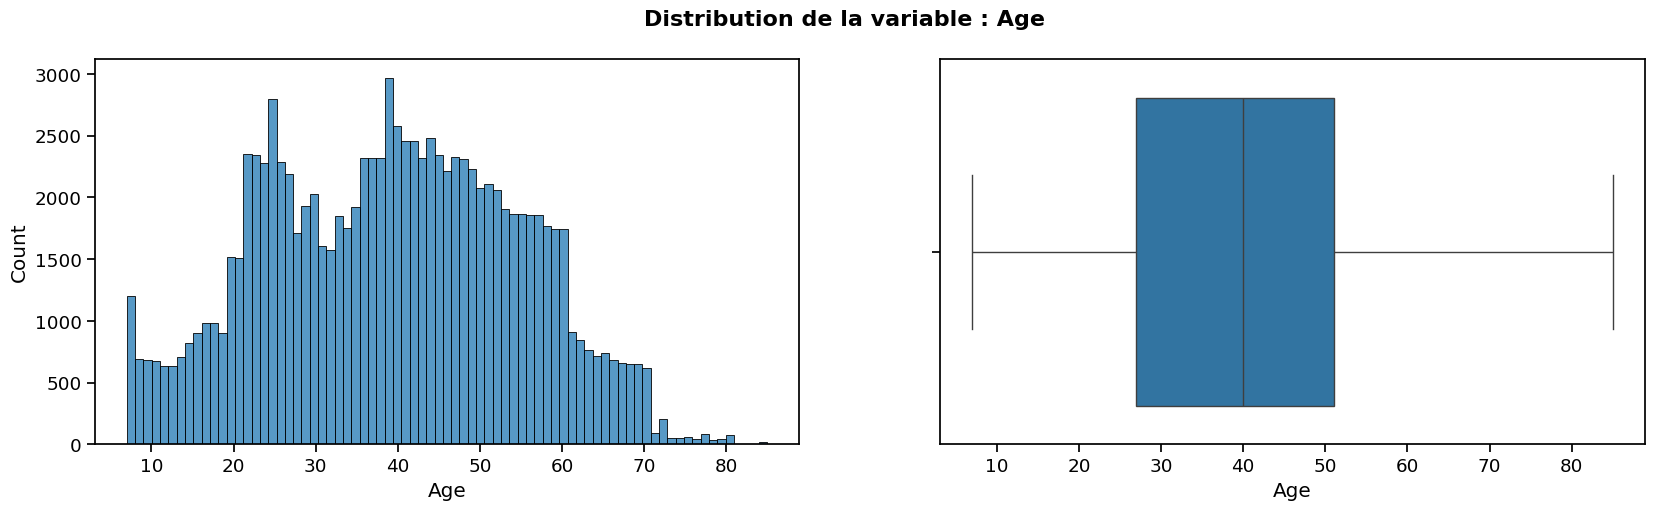

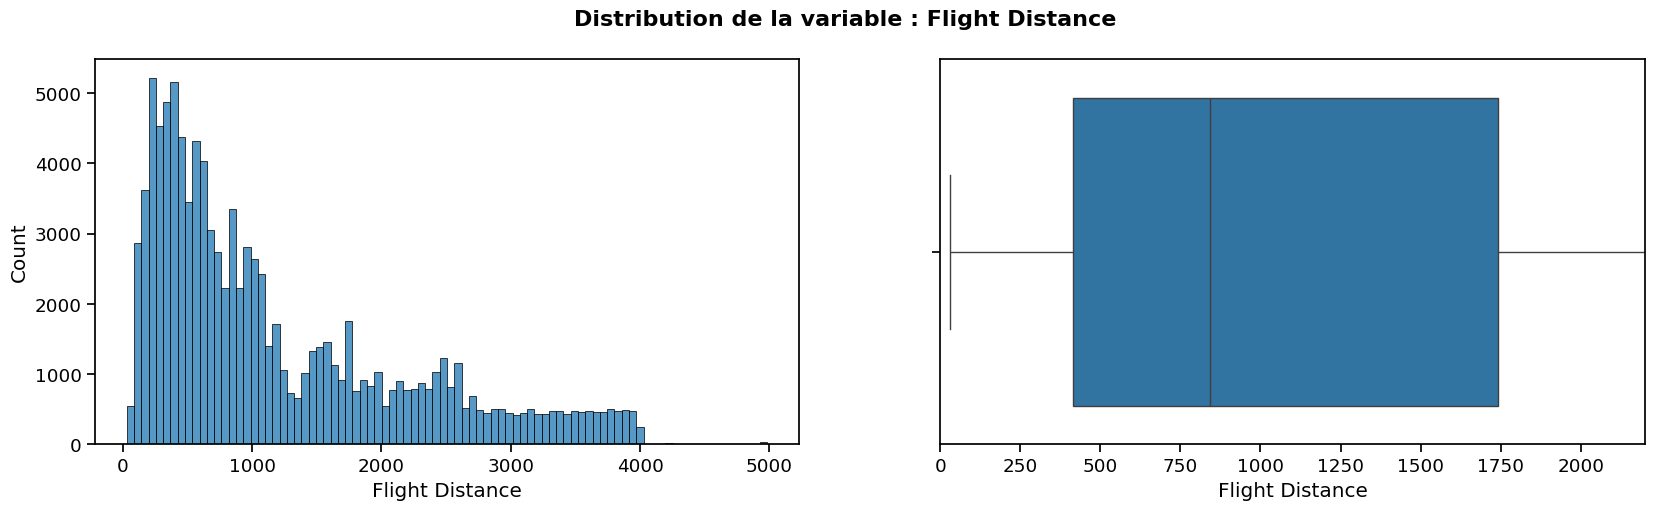

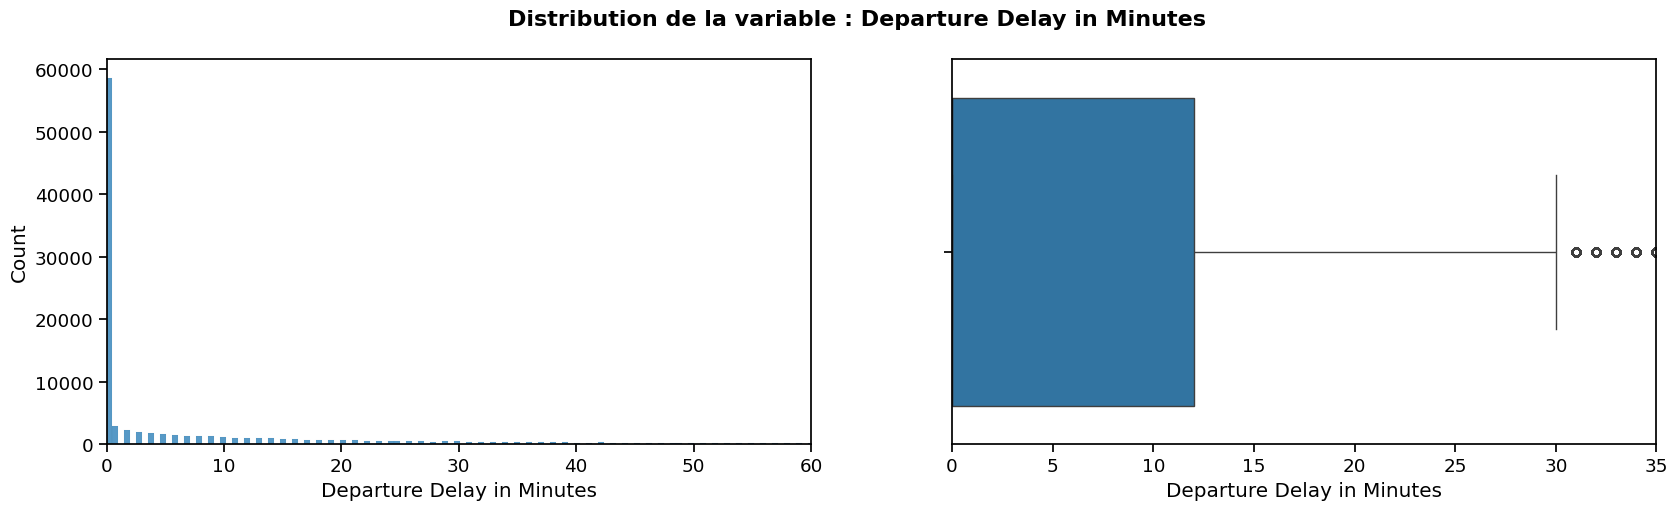

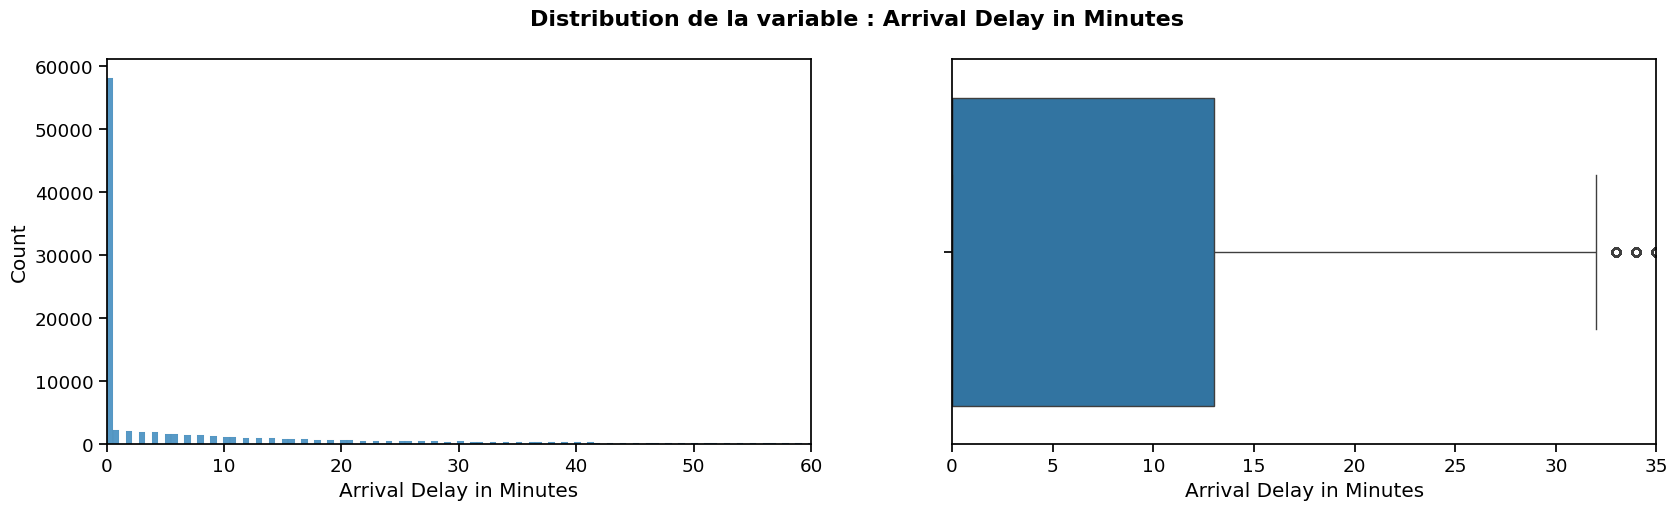

In [160]:
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(f'Distribution de la variable : {col}', fontsize=16, fontweight='bold')
    sns.histplot(data[col], ax=ax[0])
    sns.boxplot(x=data[col], ax=ax[1])
    if col == "Flight Distance":
        ax[1].set_xlim(0, 2200) 
    elif col == "Departure Delay in Minutes":
        ax[0].set_xlim(0, 60)
        ax[1].set_xlim(0, 35)
    elif col == "Arrival Delay in Minutes":
        ax[0].set_xlim(0, 60)
        ax[1].set_xlim(0, 35)
    plt.show()

<h3>Qualitative</h3>

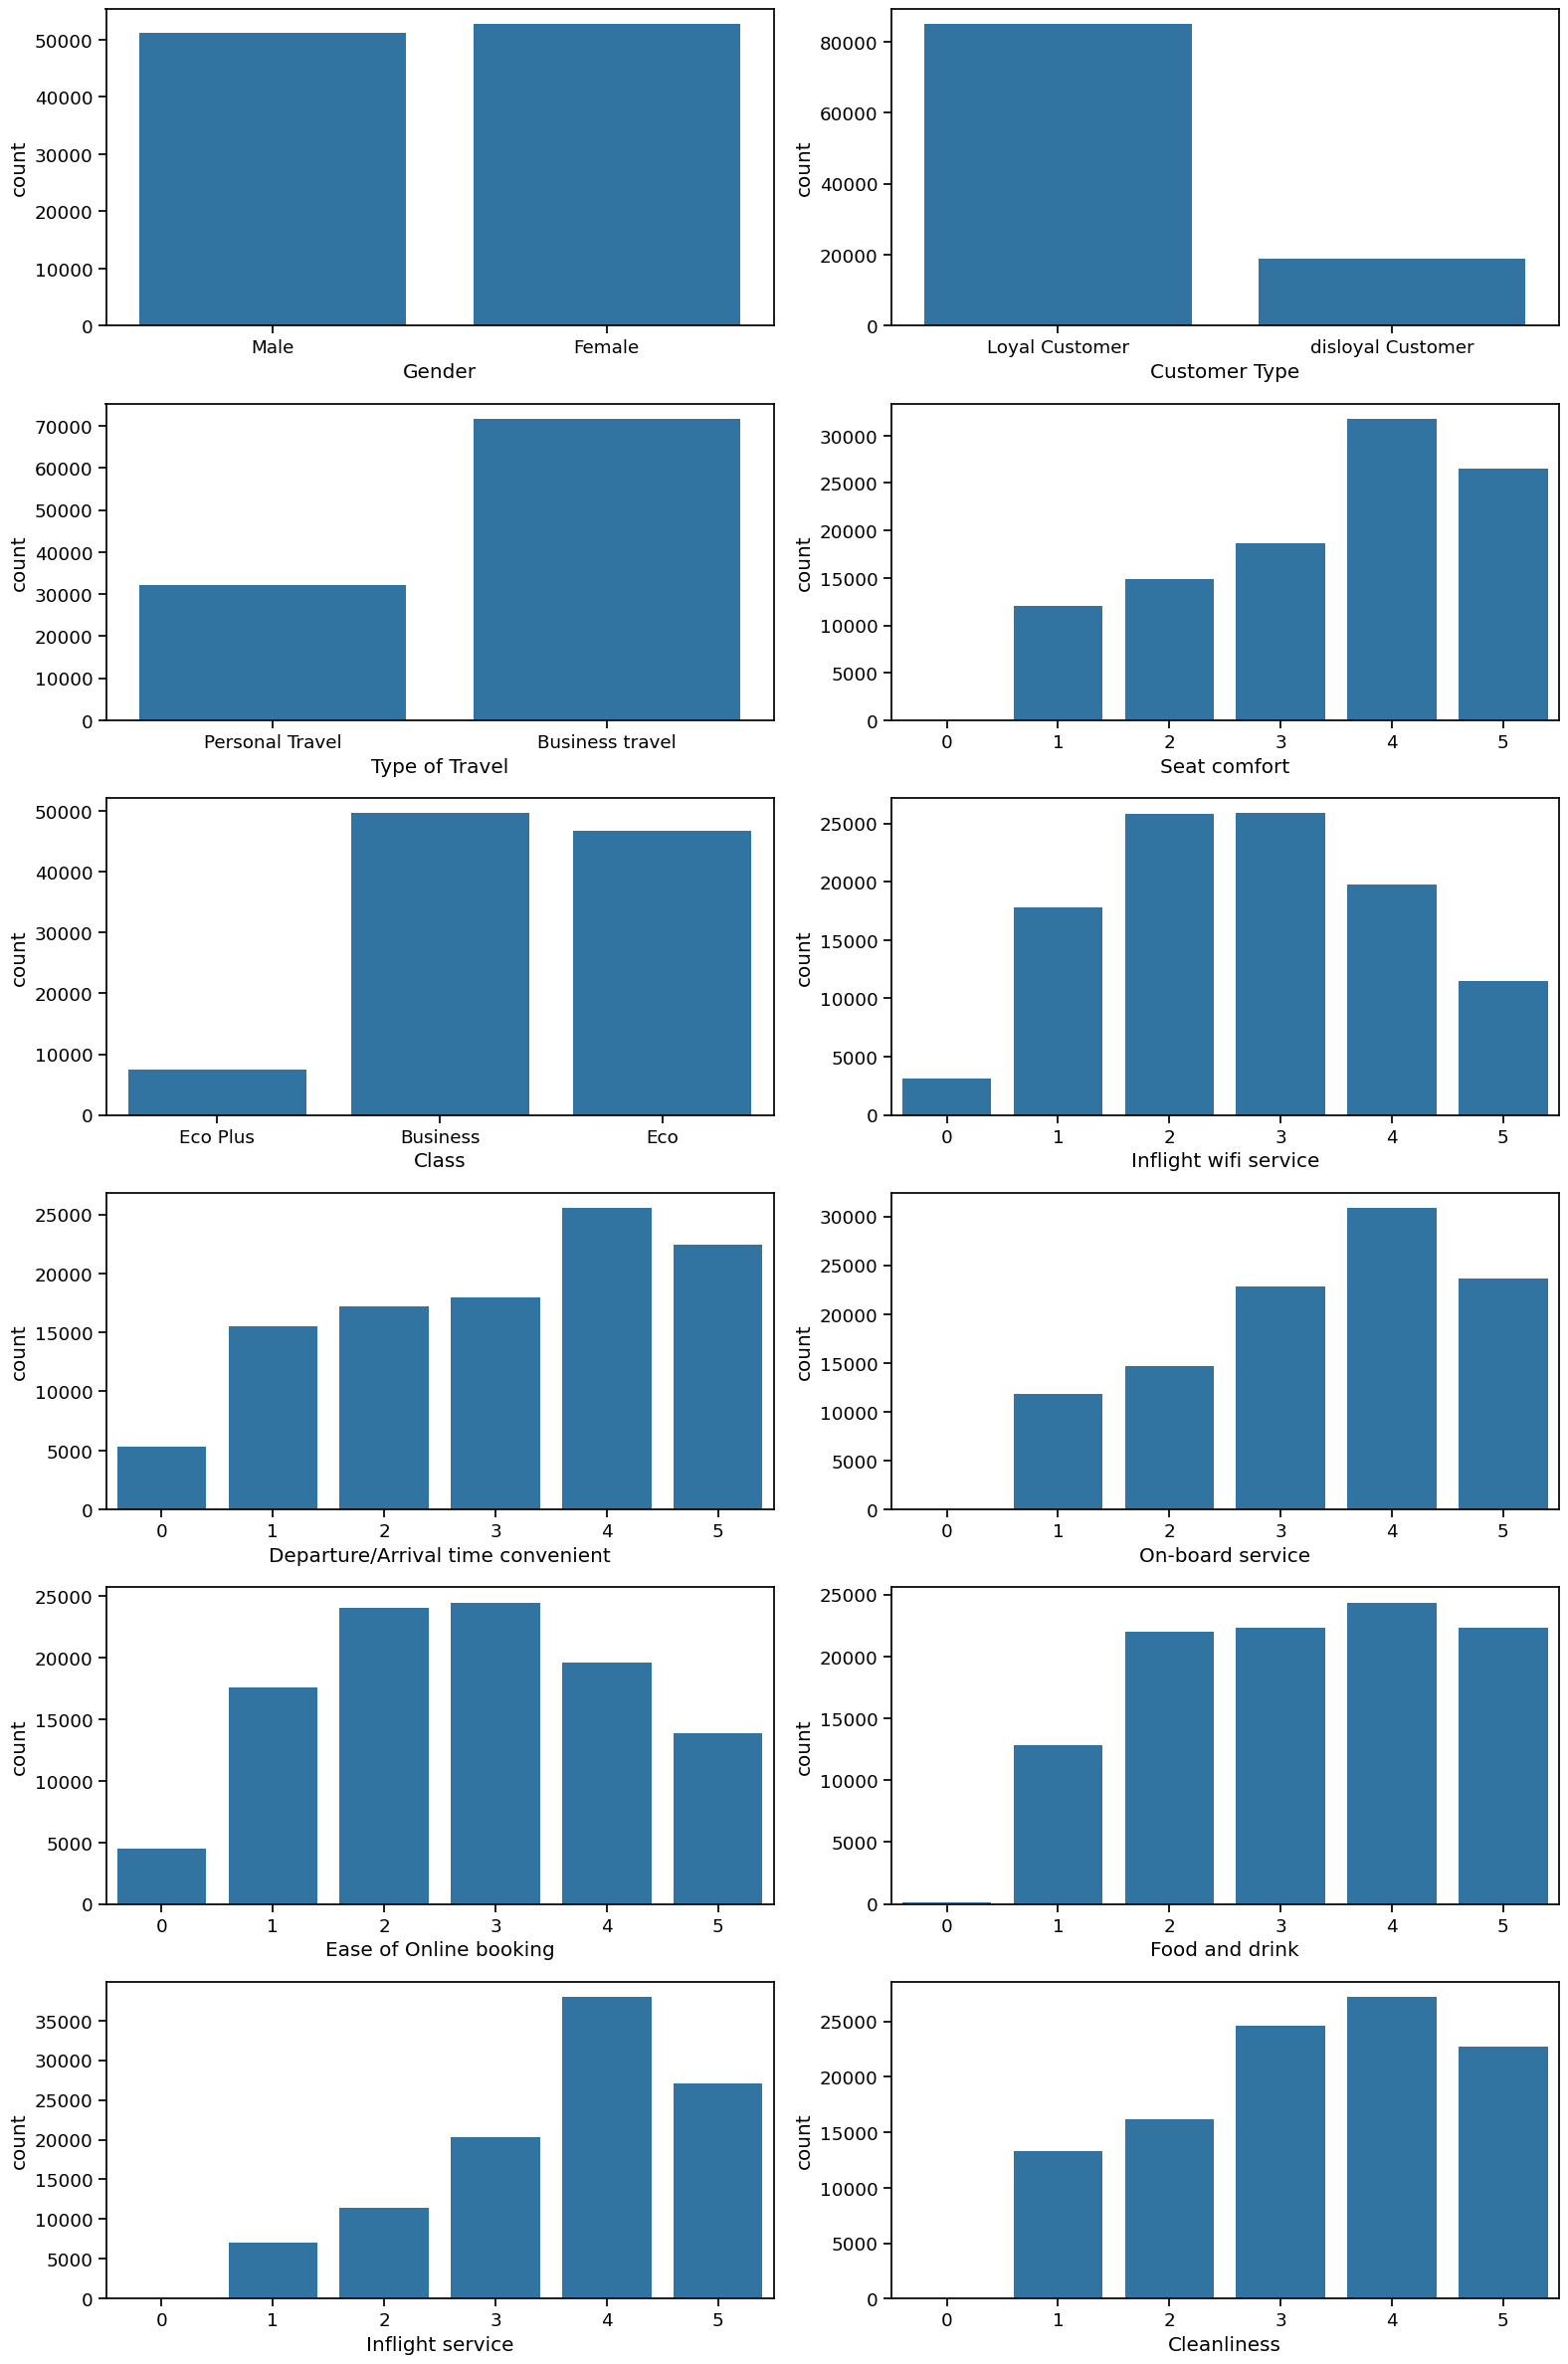

In [161]:
fig, axes = plt.subplots(6, 2, figsize=(16, 24))
sns.countplot(x='Gender', data=data, ax=axes[0, 0])
sns.countplot(x='Customer Type', data=data, ax=axes[0, 1])
sns.countplot(x='Type of Travel', data=data, ax=axes[1, 0])
sns.countplot(x='Seat comfort', data=data, ax=axes[1, 1])
sns.countplot(x='Class', data=data, ax=axes[2, 0])
sns.countplot(x='Inflight wifi service', data=data, ax=axes[2, 1])
sns.countplot(x='Departure/Arrival time convenient', data=data, ax=axes[3, 0])
sns.countplot(x='On-board service', data=data, ax=axes[3, 1])
sns.countplot(x='Ease of Online booking', data=data, ax=axes[4, 0])
sns.countplot(x='Food and drink', data=data, ax=axes[4, 1])
sns.countplot(x='Inflight service', data=data, ax=axes[5, 0])
sns.countplot(x='Cleanliness', data=data, ax=axes[5, 1])
plt.tight_layout()
plt.show()

## Analyse Bivariée

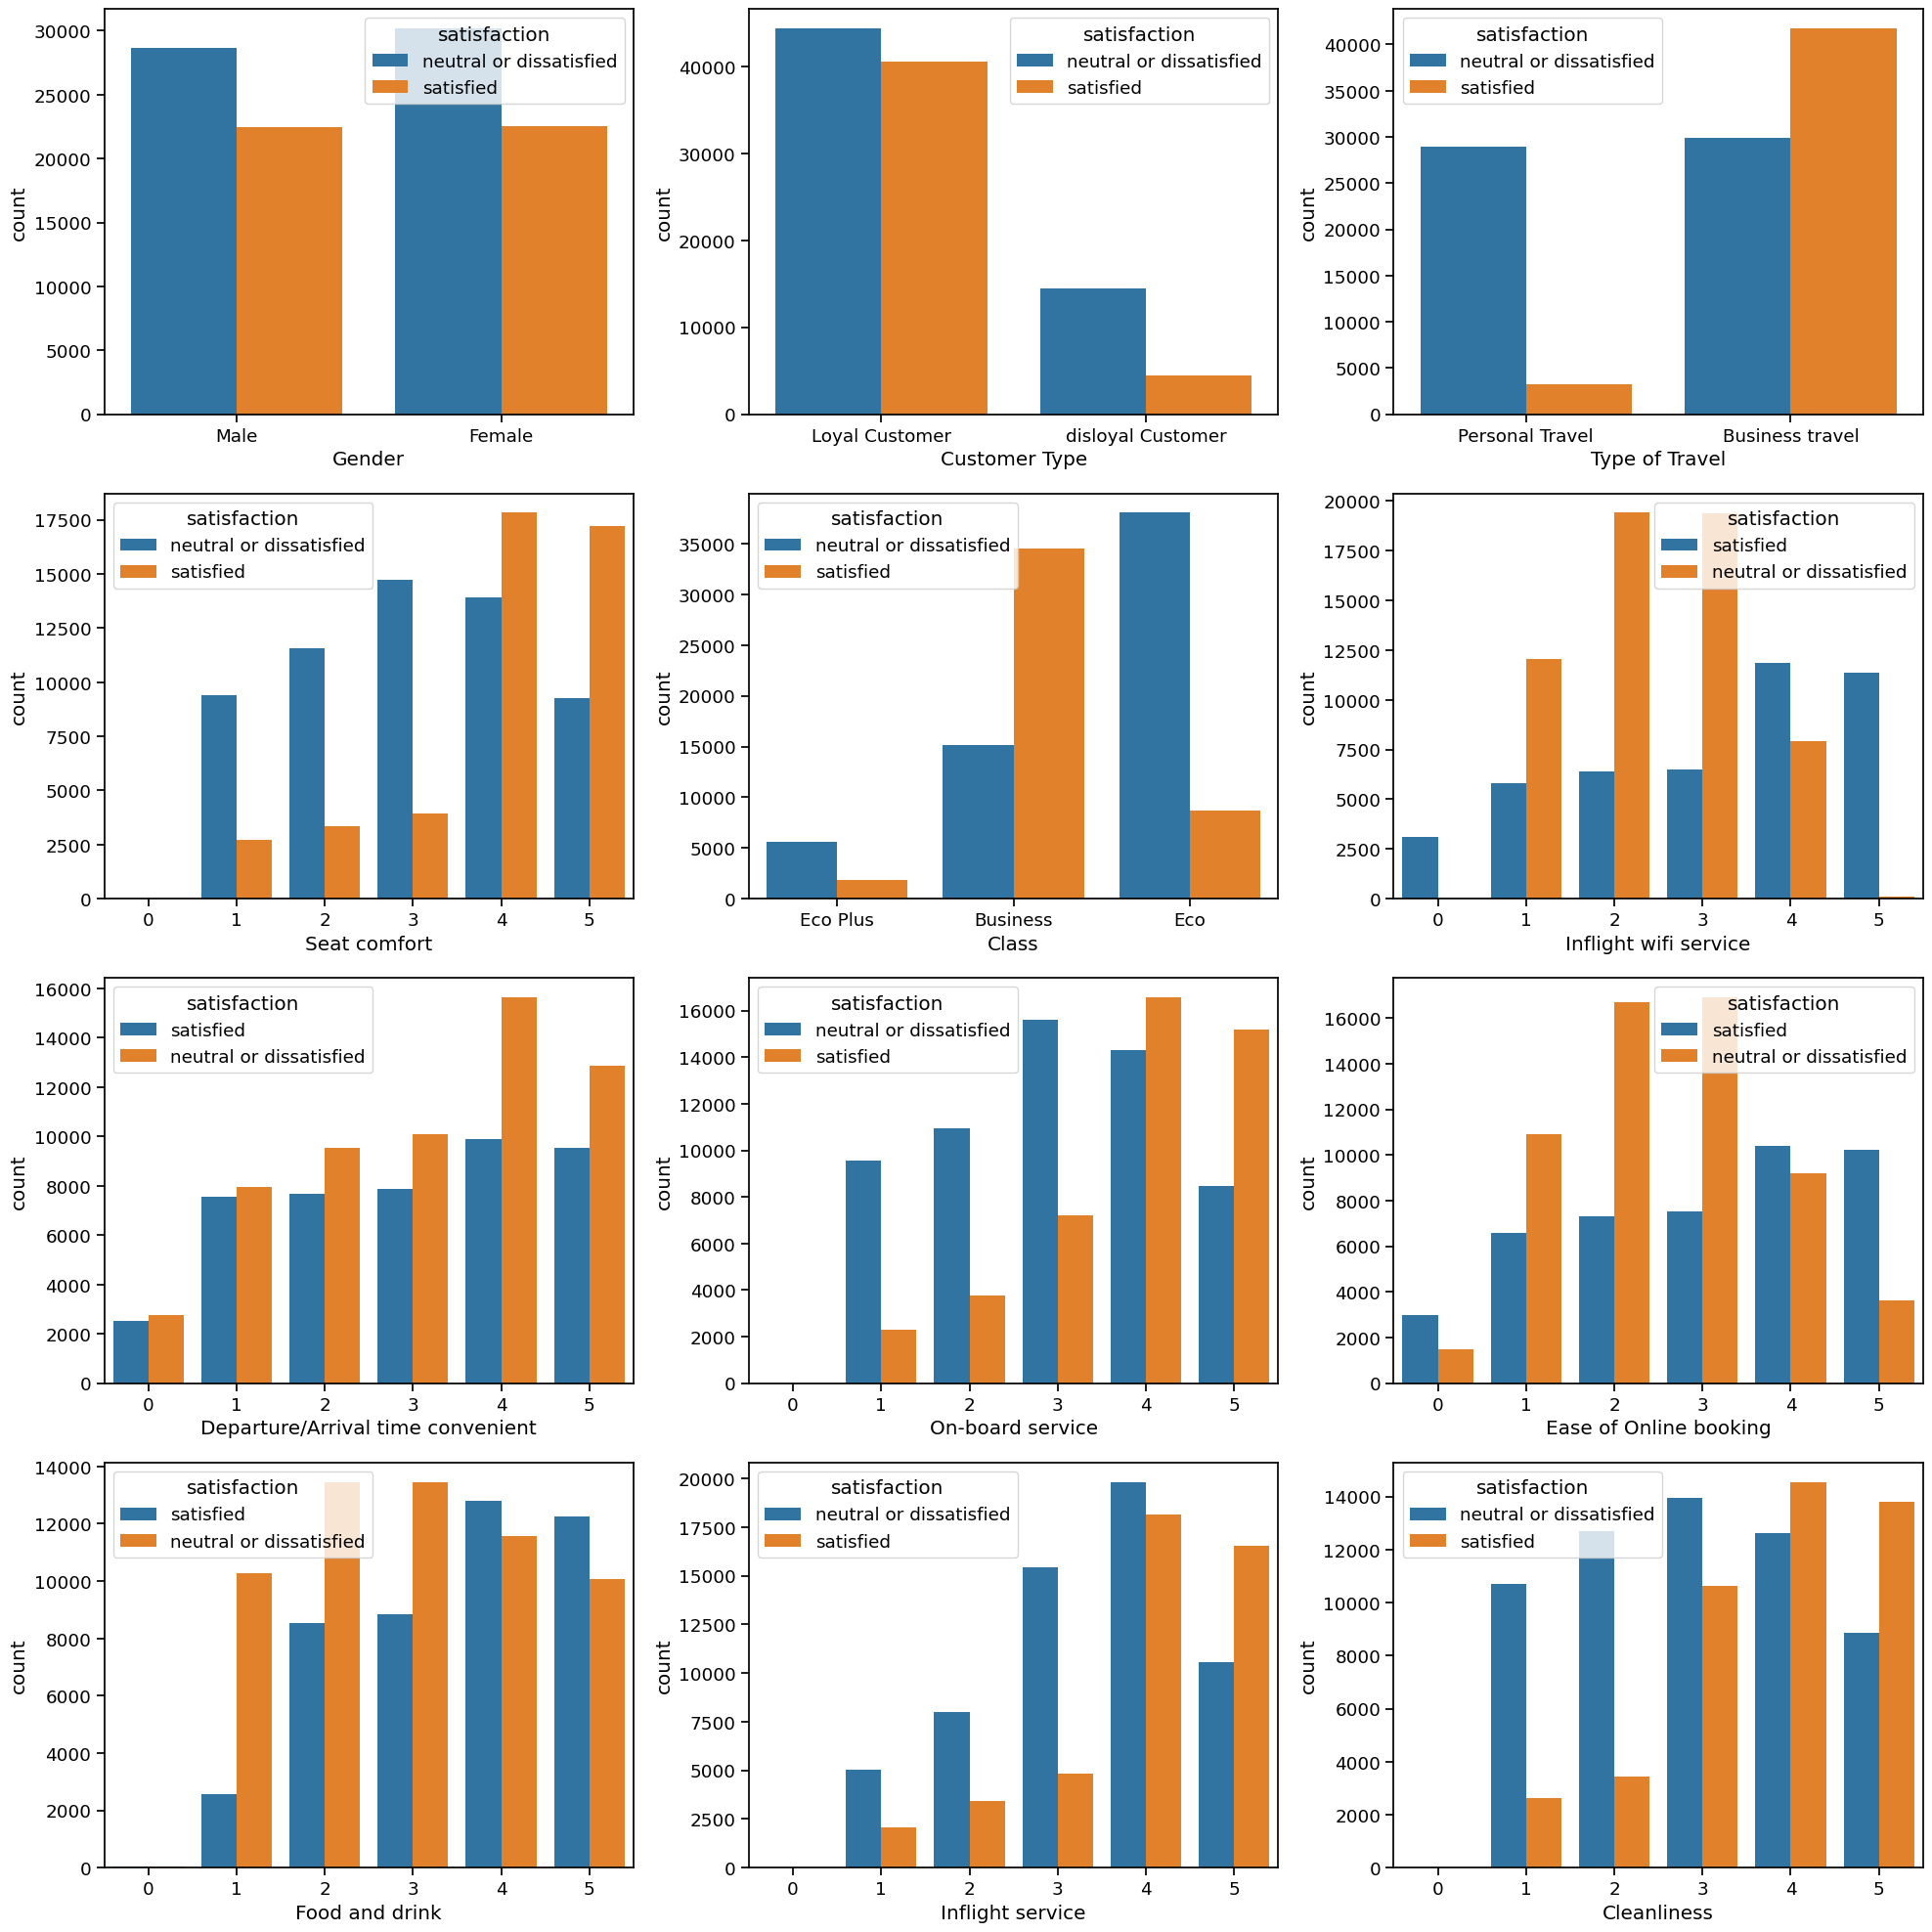

In [164]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
sns.countplot(x='Gender', data=data, hue='satisfaction', ax=axes[0, 0])
sns.countplot(x='Customer Type', data=data, hue='satisfaction', ax=axes[0, 1])
sns.countplot(x='Type of Travel', data=data, hue='satisfaction', ax=axes[0, 2])
sns.countplot(x='Seat comfort', data=data, hue='satisfaction', ax=axes[1, 0])
sns.countplot(x='Class', data=data, hue='satisfaction', ax=axes[1, 1])
sns.countplot(x='Inflight wifi service', data=data, hue='satisfaction', ax=axes[1, 2])
sns.countplot(x='Departure/Arrival time convenient', data=data, hue='satisfaction', ax=axes[2, 0])
sns.countplot(x='On-board service', data=data, hue='satisfaction', ax=axes[2, 1])
sns.countplot(x='Ease of Online booking', data=data, hue='satisfaction', ax=axes[2, 2])
sns.countplot(x='Food and drink', data=data, hue='satisfaction', ax=axes[3, 0])
sns.countplot(x='Inflight service', data=data, hue='satisfaction', ax=axes[3, 1])
sns.countplot(x='Cleanliness', data=data, hue='satisfaction', ax=axes[3, 2])
plt.tight_layout()
plt.show()

In [165]:
pairs = list(combinations(num_columns, 2))
print(pairs)

[('Age', 'Flight Distance'), ('Age', 'Departure Delay in Minutes'), ('Age', 'Arrival Delay in Minutes'), ('Flight Distance', 'Departure Delay in Minutes'), ('Flight Distance', 'Arrival Delay in Minutes'), ('Departure Delay in Minutes', 'Arrival Delay in Minutes')]


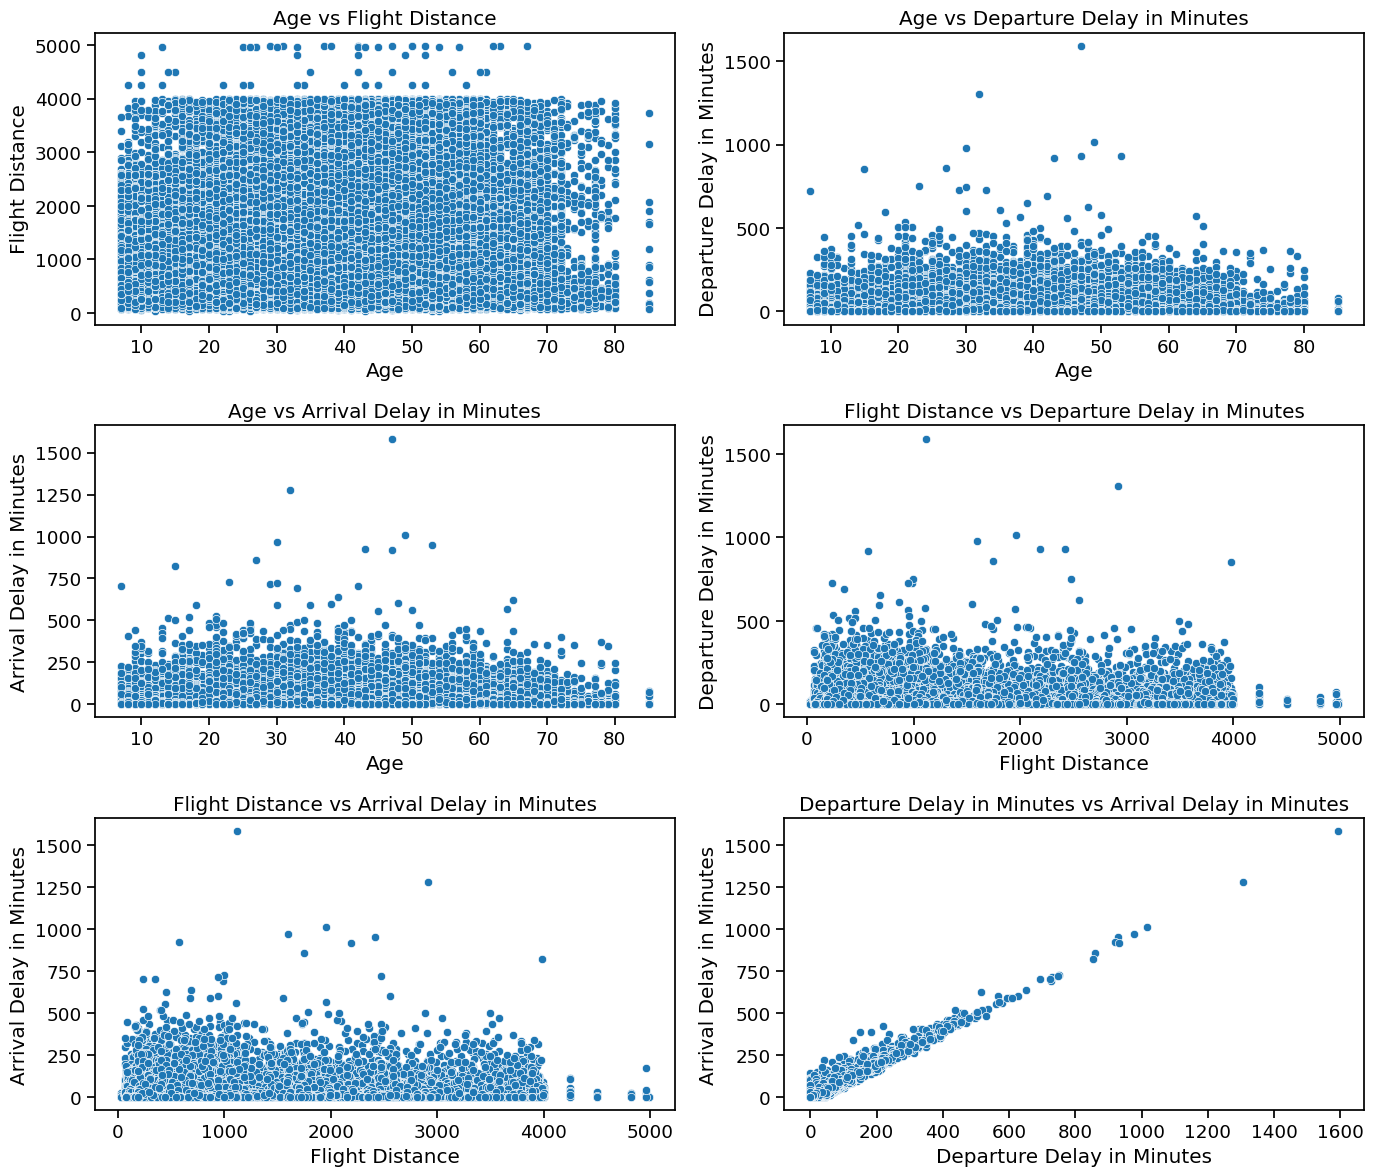

In [166]:
from itertools import combinations
pairs = list(combinations(num_columns, 2))
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
for idx, (var1, var2) in enumerate(pairs):
    sns.scatterplot(data=data, x=var1, y=var2, ax=axes[idx])
    axes[idx].set_title(f'{var1} vs {var2}')
plt.tight_layout()
plt.show()

<h3>Analyse multivariée</h3>

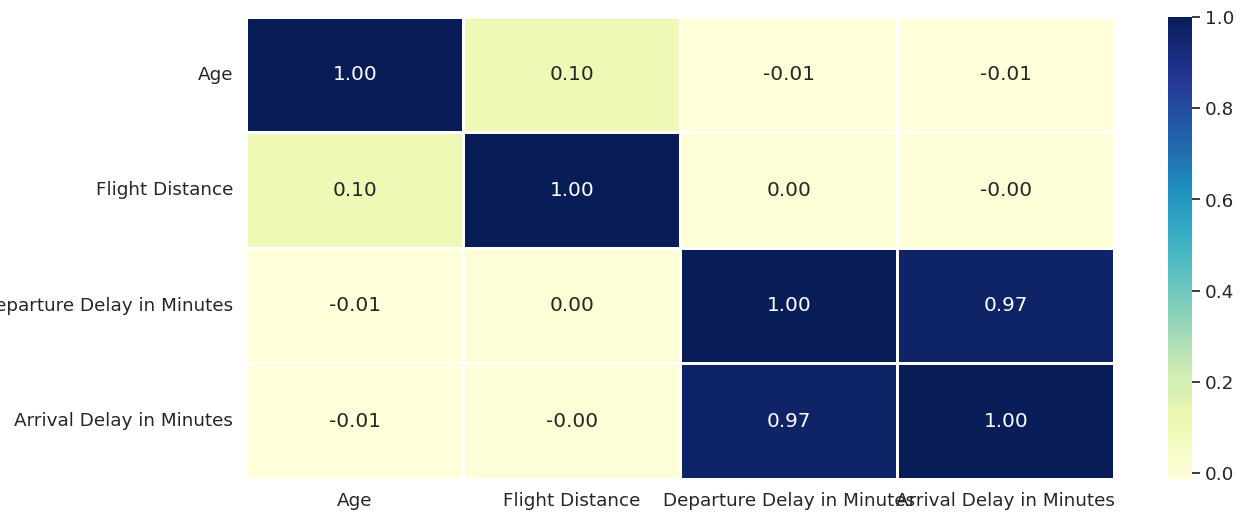

In [167]:
with sns.axes_style('white'):
    plt.figure(figsize= (14, 6))
    sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")